# Data Gathering/ Data Reading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('spam.csv',encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
print(data.head())
tags = data["label"]
texts = data["text"]

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## UNDERSTANDING AND PREPROCESSING THE DATASET

In [2]:
data.describe() #checking characteristics of data 

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [3]:
duplicatedRow = data[data.duplicated()]#storing duplicated texts in the data
print(duplicatedRow[:5]) #check the data 

    label                                               text
102   ham  As per your request 'Melle Melle (Oru Minnamin...
153   ham  As per your request 'Melle Melle (Oru Minnamin...
206   ham  As I entered my cabin my PA said, '' Happy B'd...
222   ham                             Sorry, I'll call later
325   ham                   No calls..messages..missed calls


In [4]:
ham = data[data.label =='ham'] #storing ham messages
spam =data[data.label=="spam"] #storing spam messages
print (ham)
print (spam)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
6      ham  Even my brother is not like to speak with me. ...
...    ...                                                ...
5565   ham                                       Huh y lei...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[4825 rows x 2 columns]
     label                                               text
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network cust

In [5]:
#combining all the words to one variable to use in creating word cloud
ham_msg = " ".join(ham.text.to_numpy().tolist()) 
spam_msg = " ".join(spam.text.to_numpy().tolist())
print (ham_msg)
print (spam_msg)

ham" Not from this campus. Are you in the library? The affidavit says  &lt;#&gt;  E Twiggs St, division g, courtroom  &lt;#&gt; , &lt;TIME&gt;  AM. I'll double check and text you again tomorrow How will I creep on you now? ;_; Tell your friends what you plan to do on Valentines day @ &lt;URL&gt; If I get there before you after your ten billion calls and texts so help me god Purity of friendship between two is not about smiling after reading the forwarded message..Its about smiling just by seeing the name. Gud evng musthu I've told him that i've returned it. That should i re order it. House-Maid is the murderer, coz the man was murdered on  &lt;#&gt; th January.. As public holiday all govt.instituitions are closed,including post office.. Depends on where u going lor. And smile for me right now as you go and the world will wonder what you are smiling about and think your crazy and keep away from you ... *grins* Lil fever:) now fine:) I think it's all still in my car Can a not? Yes prince

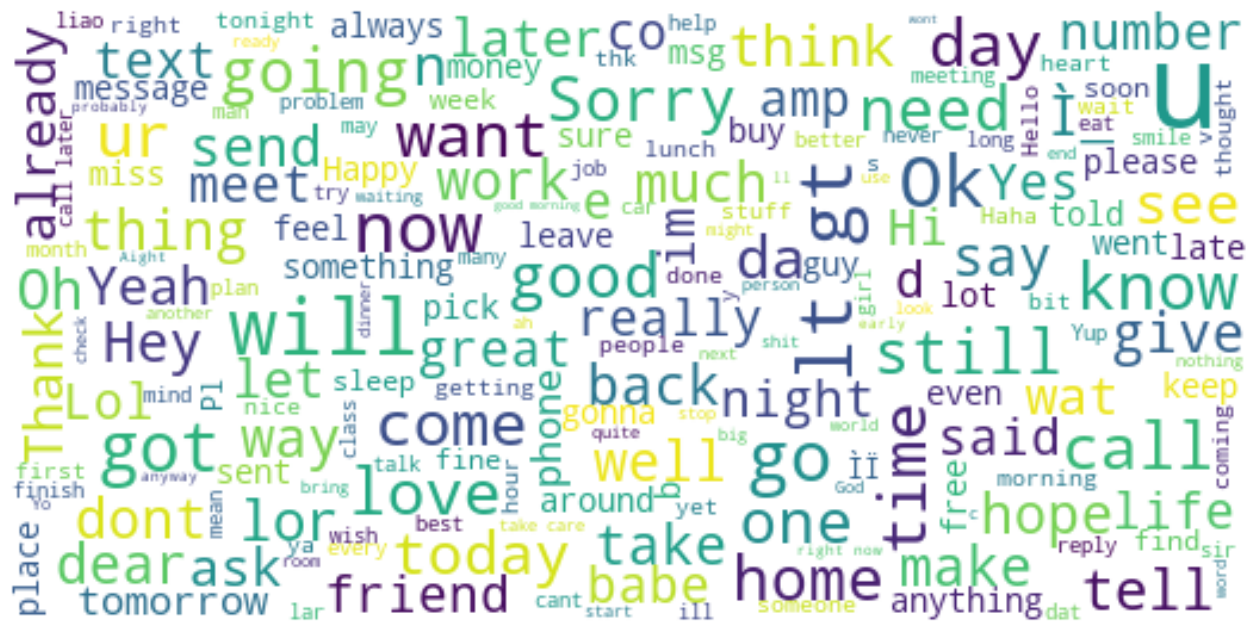

done


In [6]:
#visualizing Dataset to understand the data 
#visualizing ham messages frequently used words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# wordcloud of ham messages
stop=STOPWORDS
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="White").generate(ham_msg)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()
print("done") #to check if the code is running

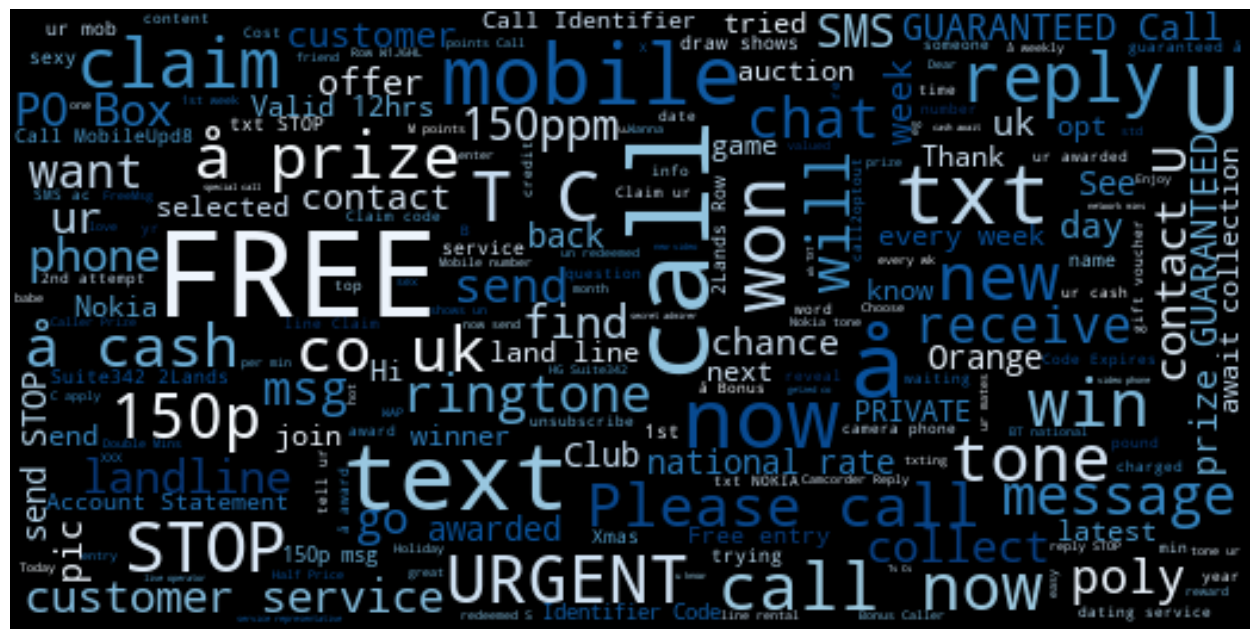

done


In [7]:
#visualizing spam messages frequently used words
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="Black", colormap='Blues').generate(spam_msg)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()
print("done") #to check if the code is running

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


spam percentage 13.406317300789663
ham percentage 86.59368269921033


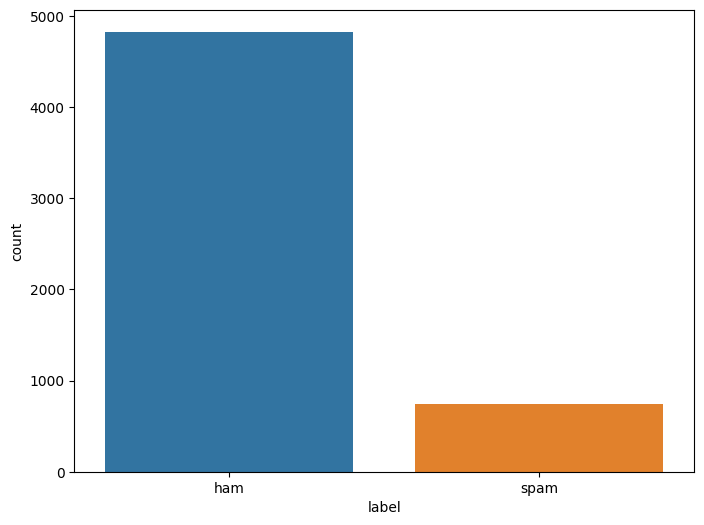

In [8]:
#data visualization
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data.label)
# Percentage of spam messages in the dataset
print("spam percentage",(len(spam)/(len(ham)+len(spam)))*100)
print("ham percentage",(len(ham)/(len(ham)+len(spam)))*100)

In [9]:
#downsampling the dataset since the data is not balance
#making the number of ham messages equal to spam by downsampling it
ham_df = ham.sample(n = len(spam), random_state = 44) #take samples in the ham message equal to the length of the spam messsages
spam_df = spam
print(ham_df.shape, spam_df.shape) #check if the dimension is the same

(747, 2) (747, 2)


C:\Users\hp\AppData\Local\Temp\ipykernel_10512\171345883.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_df.append(spam_df).reset_index(drop=True)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Tags')

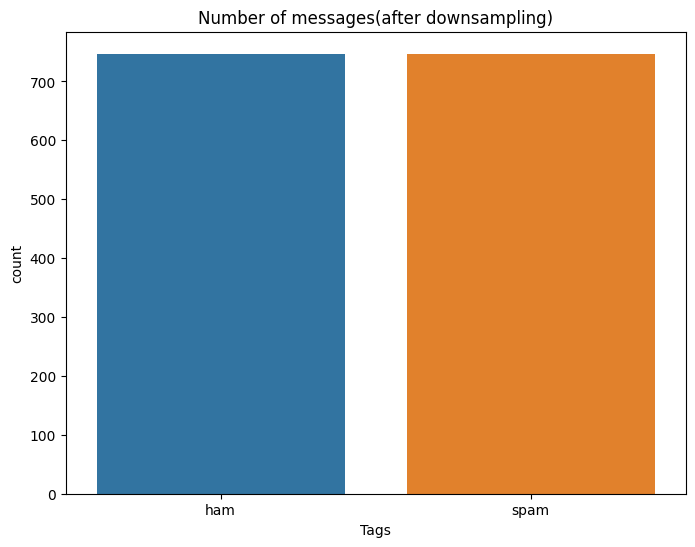

In [10]:
#visualizing downsampled data
msg_df = ham_df.append(spam_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Number of messages(after downsampling)')
plt.xlabel('Tags')

In [11]:
#combining the spam and ham message for creating trainset and testset
msg_df = ham_df.append(spam_df).reset_index(drop=True)
msg_df.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_10512\3127368945.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_df.append(spam_df).reset_index(drop=True)


,label,text
0,ham,"Yes, princess. Toledo."
1,ham,Dude while were makin those weirdy brownies my...
2,ham,"Hiya, sorry didn't hav signal. I haven't seen ..."
3,ham,Then u ask darren go n pick u lor... But i oso...
4,ham,Lol no. I just need to cash in my nitros. Hurr...


In [12]:
# Get length column for each text
msg_df['text_length'] = msg_df['text'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

C:\Users\hp\AppData\Local\Temp\ipykernel_10512\3873375206.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  labels = msg_df.groupby('label').mean()


,text_length
label,
ham,69.626506
spam,138.866131


In [13]:
#Processing the data dividing the trainset and testset
from sklearn.model_selection import train_test_split

msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1}) #converting ham label as zero, spam as one
msg_label = msg_df['msg_type'].values

# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['text'], msg_label, test_size=0.25, random_state=434)

In [14]:
# Defining pre-processing hyperparameters for tokenizer
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500



In [15]:
#converting words to numeric data
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [16]:
# Get the converted text to numeric / index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'now': 11,
 'is': 12,
 '2': 13,
 'and': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'have': 18,
 'on': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'with': 23,
 '4': 24,
 'are': 25,
 'from': 26,
 'me': 27,
 'get': 28,
 'text': 29,
 'my': 30,
 'stop': 31,
 'mobile': 32,
 'be': 33,
 'this': 34,
 'it': 35,
 'just': 36,
 'that': 37,
 'reply': 38,
 'claim': 39,
 'only': 40,
 'at': 41,
 'will': 42,
 'we': 43,
 'no': 44,
 'out': 45,
 'do': 46,
 'www': 47,
 'so': 48,
 'send': 49,
 'not': 50,
 'prize': 51,
 'our': 52,
 'but': 53,
 'if': 54,
 'cash': 55,
 'new': 56,
 'go': 57,
 'can': 58,
 "i'm": 59,
 '150p': 60,
 'up': 61,
 't': 62,
 'all': 63,
 'uk': 64,
 'week': 65,
 'win': 66,
 'nokia': 67,
 'com': 68,
 '1': 69,
 'know': 70,
 'please': 71,
 'been': 72,
 'tone': 73,
 'who': 74,
 'won': 75,
 '50': 76,
 'msg': 77,
 'service': 78,
 'phone': 79,
 'what': 80,
 'urgent': 81,
 'by': 82,
 'want': 83,
 '

In [17]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 3918 unique tokens in training data. 


In [18]:
#making the length of each sequence be the same
from tensorflow.keras.preprocessing.sequence import pad_sequences
#token to sequence
training_sequences = tokenizer.texts_to_sequences(train_msg) 
#padding the sequence
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
#creating for test
testing_sequences = tokenizer.texts_to_sequences(test_msg)
#padding test sequence
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [19]:
# Check the dimension of the test and train data
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1120, 50)
Shape of testing tensor:  (374, 50)


## Creating model ( Dense model) With given with hypertuned parameters

In [20]:
#defining new hyperparameters for the model
vocab_size = 500 
embeding_dim = 16
drop_value = 0.2
n_dense = 24

In [21]:
#Using sequential model
#creation of model with layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense,Dropout
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

# Compiling Model with parameters

In [23]:
#compiling the model 
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [24]:
# fitting the data into the model
from tensorflow.keras.callbacks import EarlyStopping
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)


Epoch 1/30
35/35 - 6s - loss: 0.6873 - accuracy: 0.5295 - val_loss: 0.6792 - val_accuracy: 0.6150 - 6s/epoch - 181ms/step
Epoch 2/30
35/35 - 0s - loss: 0.6650 - accuracy: 0.7607 - val_loss: 0.6482 - val_accuracy: 0.7914 - 495ms/epoch - 14ms/step
Epoch 3/30
35/35 - 1s - loss: 0.6205 - accuracy: 0.8509 - val_loss: 0.5919 - val_accuracy: 0.8636 - 636ms/epoch - 18ms/step
Epoch 4/30
35/35 - 1s - loss: 0.5481 - accuracy: 0.8777 - val_loss: 0.5137 - val_accuracy: 0.8770 - 694ms/epoch - 20ms/step
Epoch 5/30
35/35 - 0s - loss: 0.4657 - accuracy: 0.8884 - val_loss: 0.4308 - val_accuracy: 0.8930 - 476ms/epoch - 14ms/step
Epoch 6/30
35/35 - 1s - loss: 0.3831 - accuracy: 0.8973 - val_loss: 0.3607 - val_accuracy: 0.8930 - 537ms/epoch - 15ms/step
Epoch 7/30
35/35 - 1s - loss: 0.3189 - accuracy: 0.9116 - val_loss: 0.3045 - val_accuracy: 0.9064 - 567ms/epoch - 16ms/step
Epoch 8/30
35/35 - 1s - loss: 0.2666 - accuracy: 0.9214 - val_loss: 0.2613 - val_accuracy: 0.9171 - 641ms/epoch - 18ms/step
Epoch 9/30

# Evaluating the Model and Prediction Testing 

In [25]:
# Evaluating the accuracy using the testing_padded data and test labels
model.evaluate(testing_padded, test_labels) #accuracy: 0.9626 , loss: 0.1011

12/12 [==============================] - 0s 9ms/step - loss: 0.1026 - accuracy: 0.9679


[0.10262851417064667, 0.9679144620895386]

# Predicting the data "Texts" Results

In [26]:
# creating converter for the test message and predict the padded test message 
def predict(msg):
    new_seq = tokenizer.texts_to_sequences(msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))


In [27]:
#predict the output
testdata=pd.read_csv("output_spam.csv")
result=predict(testdata["text"])

print(result)

#rounding off/ up depends on the result accuracy
result = np.array(result)
result = result.flatten()
result[result<0.5] = 0
result[result>0] = 1
result = result.astype(int)
print(result)


1/1 [==============================] - 1s 1s/step
[[0.2199772 ]
 [0.11396667]
 [0.02149174]
 [0.05574097]
 [0.00177295]
 [0.01491359]
 [0.18762606]
 [0.00545652]
 [0.00956311]
 [0.06005407]
 [0.9983094 ]
 [0.9656502 ]
 [0.41490126]
 [0.9980312 ]
 [0.02105943]
 [0.02376669]
 [0.06435269]
 [0.15770304]
 [0.02585006]
 [0.00442501]]
[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]


In [28]:
#storing data
outputpred= pd.DataFrame({"Text":testdata.text,
                "label":result})

#mapping the data to convert 0 = ham,  1 = spam
mapped=outputpred['label'].map({0:"ham", 1:"spam"})

#storing the mapped value
outputpred=pd.DataFrame({"Text":testdata.text,
                         "label":mapped})
print(outputpred)

                                                 Text label
0   Feel Yourself That You Are Always Happy.. Slow...   ham
1   staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323   ham
2                         Send me yetty's number pls.   ham
3   Hey so this sat are we going for the intro pil...   ham
4   I got it before the new year cos yetunde said ...   ham
5   Hey we can go jazz power yoga hip hop kb and y...   ham
6   Hey mate. Spoke to the mag people. We‰Û÷re on....   ham
7                              Morning only i can ok.   ham
8                                 Wat time Ì_ finish?   ham
9               Shant disturb u anymore... Jia you...   ham
10  4mths half price Orange line rental & latest c...  spam
11  Your opinion about me? 1. Over 2. Jada 3. Kusr...  spam
12  MOON has come to color your dreams, STARS to m...   ham
13  You are a winner U have been specially selecte...  spam
14  Unless it's a situation where YOU GO GURL woul...   ham
15  Awww dat is sweet! We can think of s

In [30]:
#saving the data
outputpred.to_csv("felix_spam_output.csv",index=False)